Getting predictions from the best models of each architecture: EfficientNet, ResNet, ViT

In [22]:
# basic import
import sys
sys.path.append('../')
from ModelWrapper import ModelWrapper

In [23]:
from models.effnet_v import LitEffNetV
model_class = LitEffNetV
from utils.CustomDatasetImgVal import CustomDatasetImgVal
variables = ["CATID","SR_FR","LMSTAR"]
dataset_headings = "SR_FR"
model_params = {"in_channels": 1,"conditional_dim":1}
checkpoint_path = "../top_3/effnet2_epoch=19-step=880.ckpt"
from utils.Transformations import greyscale_downscale_random_crop_rotate_transform
transformations = greyscale_downscale_random_crop_rotate_transform
effnet_wrapper = ModelWrapper(model_class,
                                dataset_headings,
                                CustomDatasetImgVal,
                                variables,
                                transformations,
                                model_name="effnet2",
                                model_params=model_params,
                                checkpoint_path=checkpoint_path)

Loaded pretrained weights for efficientnet-b1
Loaded pretrained weights for efficientnet-b1
Loaded checkpoint: ../top_3/effnet2_epoch=19-step=880.ckpt


In [24]:
from models.resnet_v import LitResNetV
model_class = LitResNetV
from utils.CustomDatasetImgVal import CustomDatasetImgVal
variables = ["CATID","SR_FR","LMSTAR", "RE", "SIGMA_RE"]
dataset_headings = "SR_FR"
model_params = {"in_channels": 3,"conditional_dim":3}
checkpoint_path = "../top_3/resnet9_epoch=12-step=572.ckpt"
from utils.Transformations import *
transformations = downscale_centrecrop_rotate_transform
resnet_wrapper = ModelWrapper(model_class,
                                dataset_headings,
                                CustomDatasetImgVal,
                                variables,
                                transformations,
                                model_name="resnet9",
                                model_params=model_params,
                                checkpoint_path=checkpoint_path)

c:\Users\Siharath\Anaconda3\envs\lightning\lib\site-packages\lightning\pytorch\utilities\migration\utils.py:52: PossibleUserWarning: The loaded checkpoint was produced with Lightning v2.0.9, which is newer than your current Lightning version: v2.0.6
  rank_zero_warn(


Loaded checkpoint: ../top_3/resnet9_epoch=12-step=572.ckpt


In [25]:
from models.vit_v import LitViTV
model_class = LitViTV
from utils.CustomDatasetImgVal import CustomDatasetImgVal
variables = ["CATID","SR_FR","LMSTAR", "LAMBDAR_RE", "ELLIP"]
dataset_headings = "SR_FR"
model_params = {"in_channels": 3,"conditional_dim":3}
checkpoint_path = "../top_3/vit14_epoch=13-step=616.ckpt"
from utils.Transformations import *
transformations = downscale_centrecrop_rotate_transform
vit_wrapper = ModelWrapper(model_class,
                                dataset_headings,
                                CustomDatasetImgVal,
                                variables,
                                transformations,
                                model_name="vit14",
                                model_params=model_params,
                                checkpoint_path=checkpoint_path)

Loaded checkpoint: ../top_3/vit14_epoch=13-step=616.ckpt


In [26]:
correct_frs = []
incorrect_frs = []
correct_srs = []
incorrect_srs = []
models = [resnet_wrapper, effnet_wrapper, vit_wrapper]
for model in models:
    predictions, actuals, catids = model.predict_model()
    x = [catids[i] for i in range(len(catids)) if actuals[i] == predictions[i] and actuals[i] == 0]
    correct_frs.append(x)
    x = [catids[i] for i in range(len(catids)) if actuals[i] != predictions[i] and actuals[i] == 0]
    incorrect_frs.append(x)
    x = [catids[i] for i in range(len(catids)) if actuals[i] == predictions[i] and actuals[i] == 1]
    correct_srs.append(x)
    x = [catids[i] for i in range(len(catids)) if actuals[i] != predictions[i] and actuals[i] == 1]
    incorrect_srs.append(x)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\Siharath\Anaconda3\envs\lightning\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

In [27]:
predictions = []
actuals = []
catids = []

data = effnet_wrapper.predict_model()
predictions.append(data[0])
actuals.append(data[1])
catids.append(data[2])

data = resnet_wrapper.predict_model()
predictions.append(data[0])
actuals.append(data[1])
catids.append(data[2])

data = vit_wrapper.predict_model()
predictions.append(data[0])
actuals.append(data[1])
catids.append(data[2])

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(y_true, y_pred, classes, title=None, cmap=plt.cm.Blues, fontsize=30):
    """
    This function plots a confusion matrix.
    
    :param y_true: True labels
    :param y_pred: Predicted labels
    :param classes: List of class labels
    :param title: Title of the plot (optional)
    :param cmap: Colormap for the plot (default is Blues)
    :param fontsize: Font size for text in the plot (default is 30)
    """
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=fontsize*0.6)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=fontsize)
    plt.yticks(tick_marks, classes, fontsize=fontsize)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=fontsize)
    
    plt.xlabel('Predicted label', fontsize=fontsize*0.75)
    plt.ylabel('True label', fontsize=fontsize*0.75)
    plt.tight_layout()

    plt.show()

# Example usage:
# plot_confusion_matrix(actuals[0], predictions[0], [0, 1], title="EfficientNet Model 2: Greyscale + LMSTAR", fontsize=30)

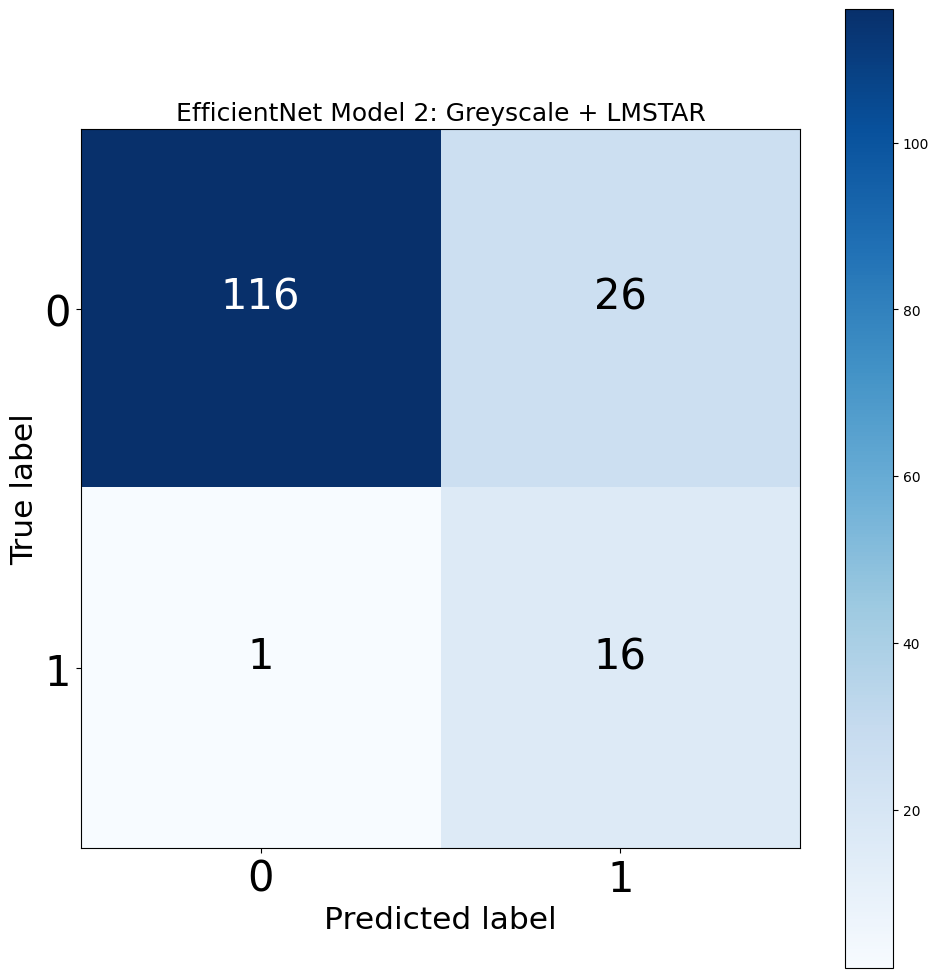

In [29]:
plot_confusion_matrix(predictions[0], actuals[0], [0,1], title="EfficientNet Model 2: Greyscale + LMSTAR")

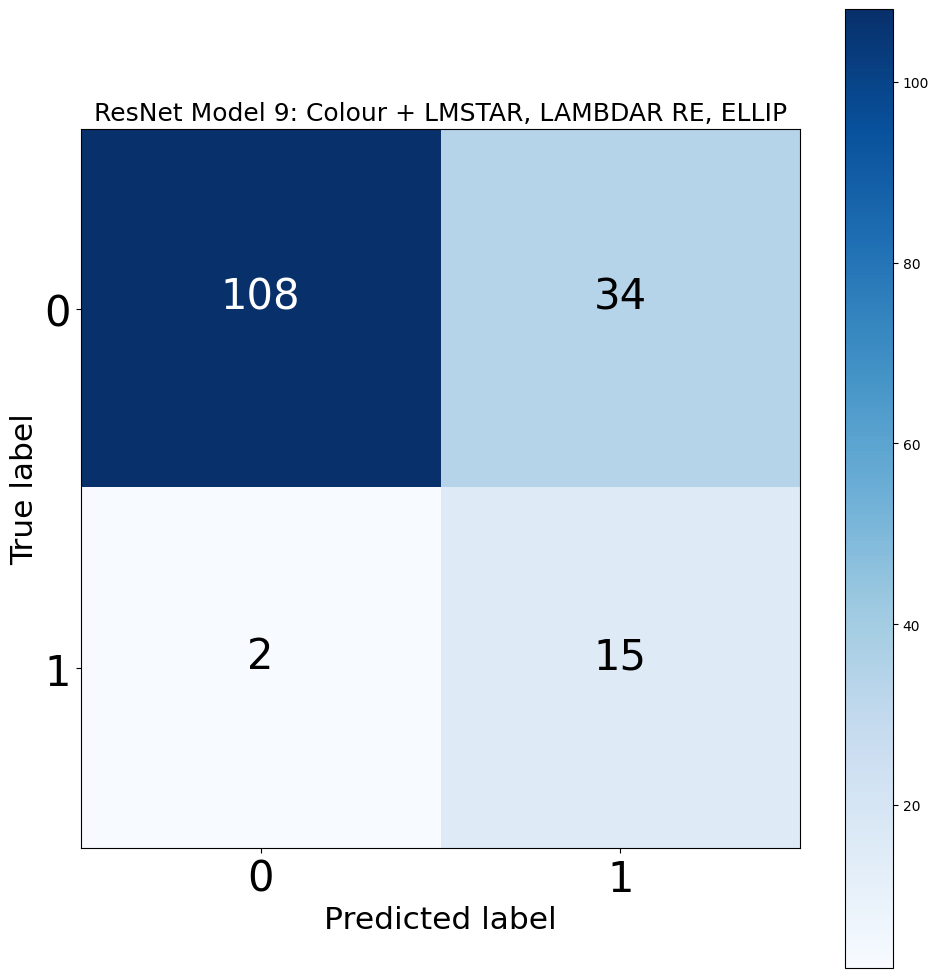

In [30]:
plot_confusion_matrix(predictions[1], actuals[1], [0,1], title="ResNet Model 9: Colour + LMSTAR, LAMBDAR RE, ELLIP")

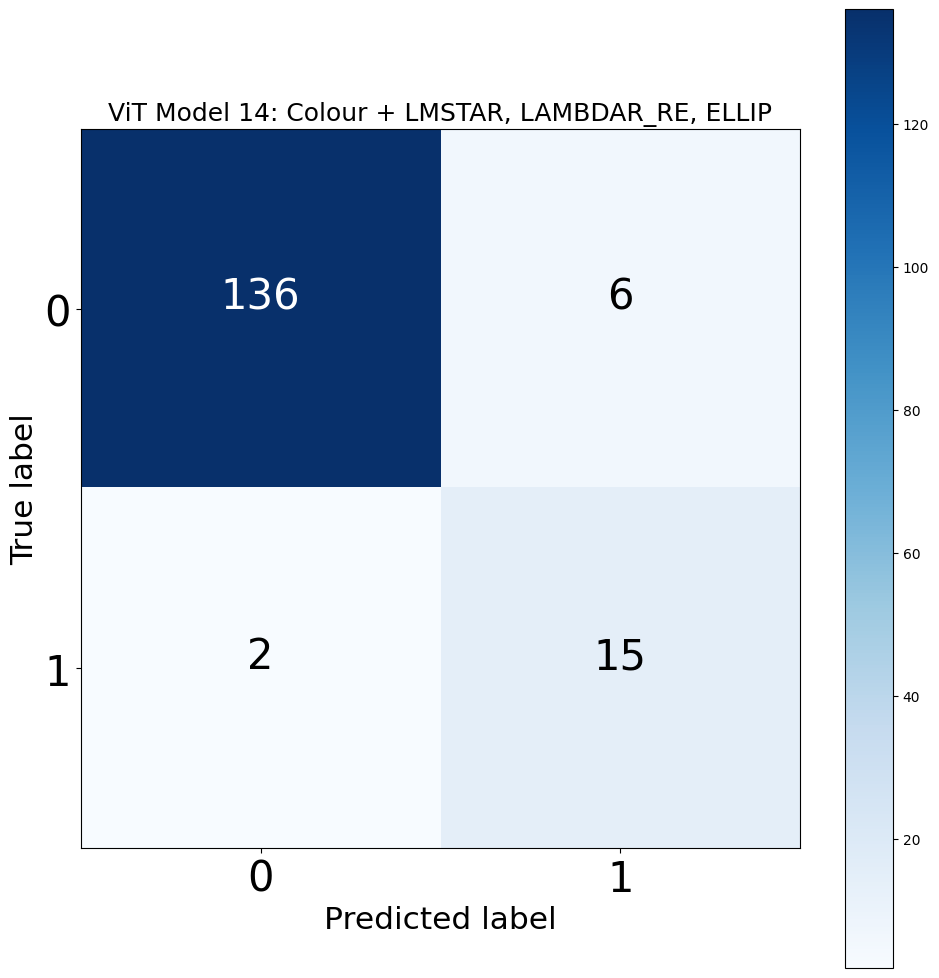

In [31]:
plot_confusion_matrix(predictions[2], actuals[2], [0,1], title="ViT Model 14: Colour + LMSTAR, LAMBDAR_RE, ELLIP")

In [32]:
import pandas as pd
test_df = pd.read_csv("../data/SR_FR_test.csv")
test_df["CATID"] = test_df["CATID"].astype(str)

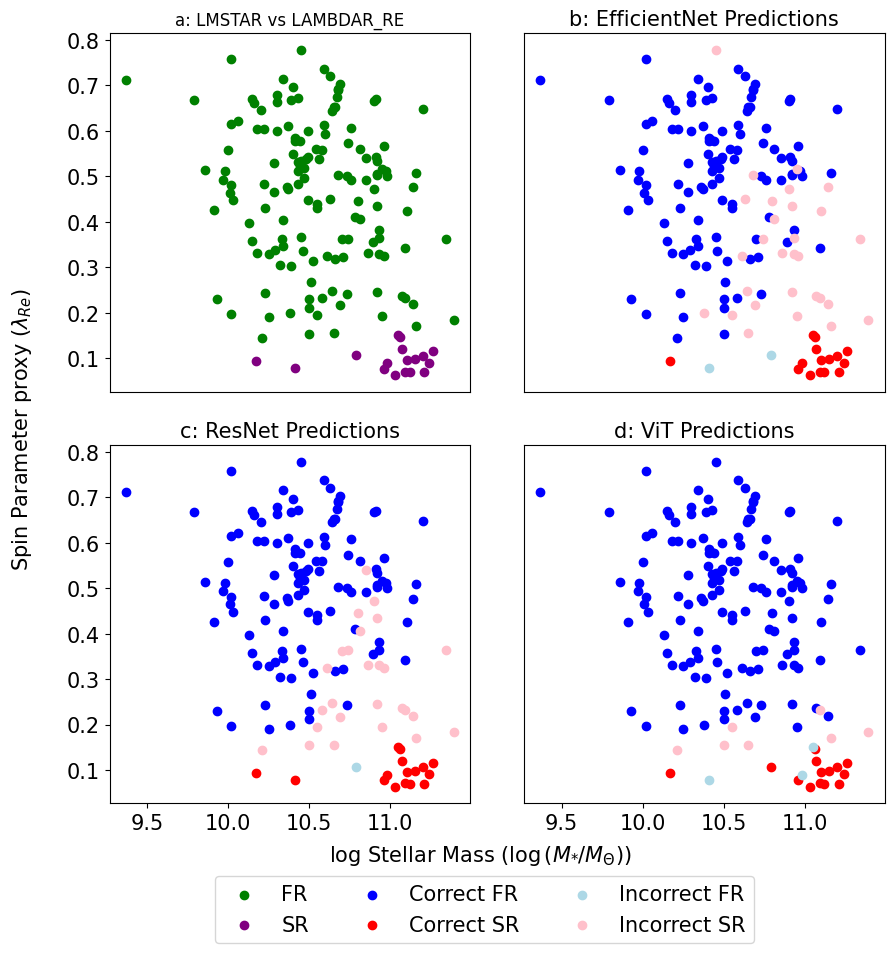

In [33]:
# 2 x 2 plot
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10,10))
# margin to subplot
fig.subplots_adjust(hspace=0.15, wspace=0.15)
# set tight

import numpy as np
# make 
axs[0, 0].scatter(test_df[test_df["SR_FR"]==0]["LMSTAR"], test_df[test_df["SR_FR"]==0]["LAMBDAR_RE"], c="green")
axs[0, 0].scatter(test_df[test_df["SR_FR"]==1]["LMSTAR"], test_df[test_df["SR_FR"]==1]["LAMBDAR_RE"], c="purple")
axs[0, 0].set_title('a: LMSTAR vs LAMBDAR_RE')
axs[0,0].set_xticks([])
axs[0, 0].tick_params(axis='both', labelsize=15)

# make 
titles = ["b: EfficientNet", "c: ResNet", "d: ViT"]
for i in range(1,4):
    row = i // 2
    col = i % 2

    axs[row, col].scatter(test_df[test_df["CATID"].isin(correct_frs[i-1])]["LMSTAR"], test_df[test_df["CATID"].isin(correct_frs[i-1])]["LAMBDAR_RE"], c="blue")
    axs[row, col].scatter(test_df[test_df["CATID"].isin(correct_srs[i-1])]["LMSTAR"], test_df[test_df["CATID"].isin(correct_srs[i-1])]["LAMBDAR_RE"], c="red")
    axs[row, col].scatter(test_df[test_df["CATID"].isin(incorrect_frs[i-1])]["LMSTAR"], test_df[test_df["CATID"].isin(incorrect_frs[i-1])]["LAMBDAR_RE"], c="lightblue")
    axs[row, col].scatter(test_df[test_df["CATID"].isin(incorrect_srs[i-1])]["LMSTAR"], test_df[test_df["CATID"].isin(incorrect_srs[i-1])]["LAMBDAR_RE"], c="pink")
    axs[row, col].set_title(f'{titles[i-1]} Predictions', fontsize=15)
 
    # no x and y axes
    if row == 0:
        axs[row, col].set_xticks([])
    if col == 1:
        axs[row, col].set_yticks([])

    axs[row, col].tick_params(axis='both', labelsize=15)
    
plt.text(6.1, 0.85, 'Spin Parameter proxy ($\lambda_{Re}$)', va='center', rotation='vertical', fontsize=15)
plt.text(9, -0.1, r'log Stellar Mass ($\log{(M_{*} / M_{\Theta}))}$', ha='center', fontsize=15)

fig.legend(['FR', 'SR', 'Correct FR', 'Correct SR', 'Incorrect FR', 'Incorrect SR'], loc='lower center', bbox_to_anchor=(0.5, -0.04), ncol=3, fontsize=15)
plt.show()

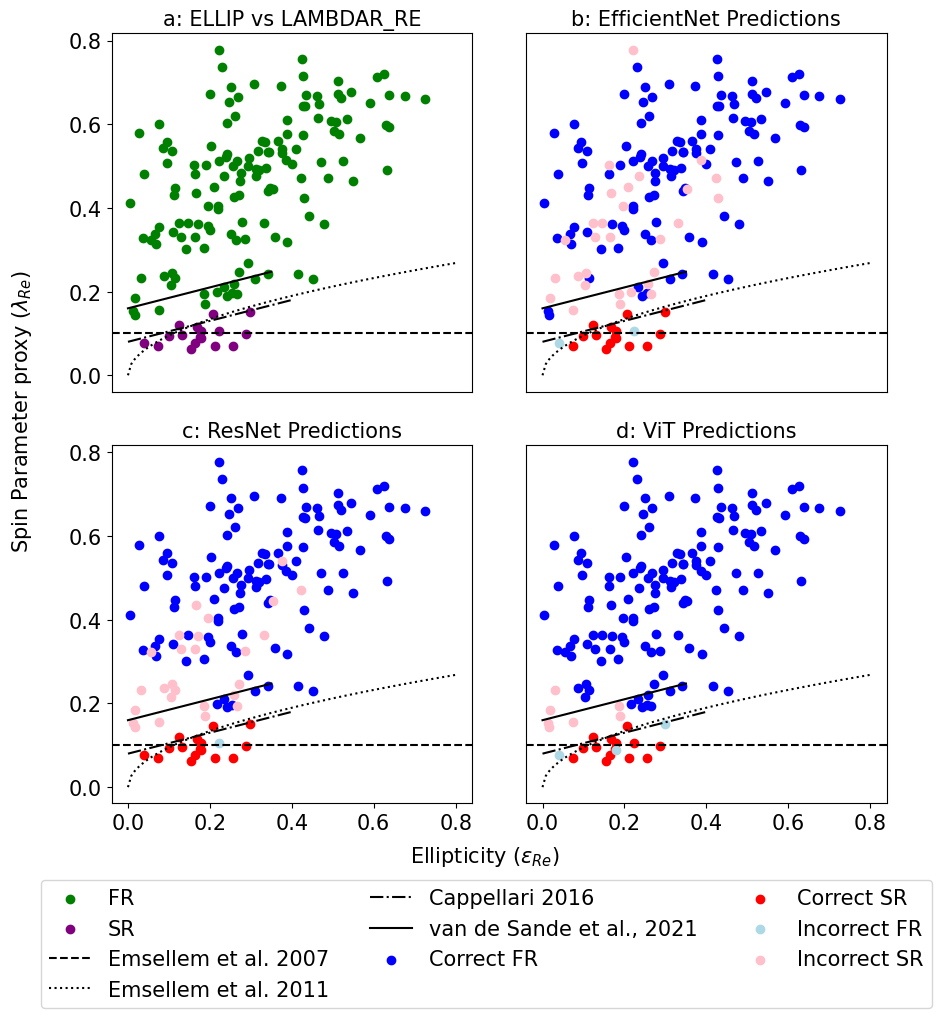

In [34]:
# 2 x 2 plot
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10,10))
# margin to subplot
fig.subplots_adjust(hspace=0.15, wspace=0.15)

# make 
axs[0, 0].scatter(test_df[test_df["SR_FR"]==0]["ELLIP"], test_df[test_df["SR_FR"]==0]["LAMBDAR_RE"], c="green")
axs[0, 0].scatter(test_df[test_df["SR_FR"]==1]["ELLIP"], test_df[test_df["SR_FR"]==1]["LAMBDAR_RE"], c="purple")
axs[0, 0].set_title('a: ELLIP vs LAMBDAR_RE', fontsize = 15)
axs[0, 0].axhline(y=0.1, color='black', linestyle='--', label = "Emsellem et al. 2007")
x = np.linspace(0, 0.8, 100)
y = 0.3 * np.sqrt(x)
axs[0, 0].plot(x, y, color='black', linestyle=':', label = "Emsellem et al. 2011")
x = np.linspace(0, 0.4, 100)
y = 0.08 + x/4
axs[0, 0].plot(x, y, color='black', linestyle='-.', label = "Cappellari 2016")
x = np.linspace(0, 0.35 + 0.16/1538, 100)
y = 0.16 + x/4
axs[0, 0].plot(x, y, color='black', linestyle='-', label = "van de Sande et al., 2021")
#axs[0, 0].set_xlabel('ELLIP')
#axs[0, 0].set_ylabel('LAMBDAR_RE')
axs[0,0].set_xticks([])
axs[0, 0].tick_params(axis='both', labelsize=15)

# make 
titles = ["b: EfficientNet", "c: ResNet", "d: ViT"]
for i in range(1,4):
    row = i // 2
    col = i % 2

    axs[row, col].scatter(test_df[test_df["CATID"].isin(correct_frs[i-1])]["ELLIP"], test_df[test_df["CATID"].isin(correct_frs[i-1])]["LAMBDAR_RE"], c="blue")
    axs[row, col].scatter(test_df[test_df["CATID"].isin(correct_srs[i-1])]["ELLIP"], test_df[test_df["CATID"].isin(correct_srs[i-1])]["LAMBDAR_RE"], c="red")
    axs[row, col].scatter(test_df[test_df["CATID"].isin(incorrect_frs[i-1])]["ELLIP"], test_df[test_df["CATID"].isin(incorrect_frs[i-1])]["LAMBDAR_RE"], c="lightblue")
    axs[row, col].scatter(test_df[test_df["CATID"].isin(incorrect_srs[i-1])]["ELLIP"], test_df[test_df["CATID"].isin(incorrect_srs[i-1])]["LAMBDAR_RE"], c="pink")
    axs[row, col].set_title(f'{titles[i-1]} Predictions', fontsize = 15)
    axs[row, col].axhline(y=0.1, color='black', linestyle='--', label = "Emsellem et al. 2007")
    x = np.linspace(0, 0.8, 100)
    y = 0.3 * np.sqrt(x)
    axs[row, col].plot(x, y, color='black', linestyle=':', label = "Emsellem et al. 2011")
    x = np.linspace(0, 0.4, 100)
    y = 0.08 + x/4
    axs[row, col].plot(x, y, color='black', linestyle='-.', label = "Cappellari 2016")
    x = np.linspace(0, 0.35 + 0.16/1538, 100)
    y = 0.16 + x/4
    axs[row, col].plot(x, y, color='black', linestyle='-', label = "van de Sande et al., 2021")

    if row == 0:
        axs[row, col].set_xticks([])
    if col == 1:
        axs[row, col].set_yticks([])

    
    axs[row, col].tick_params(axis='both', labelsize=15)

   
    #axs[row, col].set_xlabel('ELLIP')
    #axs[row, col].set_ylabel('LAMBDAR_RE')

plt.text(-1.3, 0.9, 'Spin Parameter proxy ($\lambda_{Re}$)', va='center', rotation='vertical', fontsize=15)
plt.text(-0.14, -0.18, r'Ellipticity ($\varepsilon_{Re}$)', ha='center', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


fig.legend(['FR', 'SR', "Emsellem et al. 2007", "Emsellem et al. 2011", "Cappellari 2016", "van de Sande et al., 2021", 'Correct FR', 'Correct SR', 'Incorrect FR', 'Incorrect SR'], loc='lower center', bbox_to_anchor=(0.5, -0.105), ncol=3, fontsize=15)
plt.show()